In [2]:
using Pkg
using Distributions
using Plots

In [1]:
k1 = 1
k2 = 0.04
eps = 0.01
alpha = 0.0001
v = 0001
F0 = 1
m = 1

1

In [3]:
function getDeltaX(k1,k2,eps,alpha,v,F0,m)
    return ((k2*sqrt(m)*v*pi)/(k2+2*k1)^1.5) + (2*F0*eps/(k2+2*k1)) + (((F0^2)*(m^1.5)*eps*alpha*pi)/(2*(k2+2*k1)^1.5))
end

getDeltaX (generic function with 1 method)

In [4]:
dx = getDeltaX(k1,k2,eps,alpha,v,F0,m)
dx

0.0529329864100079

In [5]:
#threshold = 1
threshold = 1
avalanchesData = zeros(1_000)
L = 1_000
increament = k1*dx
decreament = (2*k1 + k2)*dx
maxSteps = 20000;


In [6]:
1/L,increament,decreament,decreament-2*increament

(0.001, 0.0529329864100079, 0.1079832922764161, 0.002117319456400313)

In [7]:
function getHist(avalanchesData)
    sortedValues = collect(Set(avalanchesData))
    sort!(sortedValues)

    counts = zeros(length(sortedValues))

    for i in 1:length(sortedValues)
        counts[i] = count(j->(j== sortedValues[i]), avalanchesData)
    end
    return counts,sortedValues
end

getHist (generic function with 1 method)

In [8]:
function stepProcess(lattice)
    A = [findmax(lattice)[2]]
    lattice .+= 1-findmax(lattice)[1]

    # A = [Int(floor(rand(Uniform(1,L+0.9999))))]
    # lattice[A[1]] += 1
    return fall(lattice,A)  
end

stepProcess (generic function with 1 method)

In [9]:
function fall(lattice,A)
    # if lattice[A[1]] < threshold
    #     return lattice,0
    # end
    nFalls = 1
    B = []
    while length(A)+length(B) != 0 
        lattice,B = check(lattice,A)
        lattice,A = check(lattice,B)  

        nFalls += length(A)+length(B)

        if nFalls > maxSteps
            println("reached to the max")
            break

        end

    end

    return lattice,nFalls

end

fall (generic function with 1 method)

In [10]:
lattice = rand(Uniform(0,threshold), L);

In [11]:
# lattice = Int.(floor.(rand(Uniform(0,threshold), L)));

In [12]:
function runProcess(lattice,steps)
    dataSet = zeros(steps)

    for _ in 1:10000
        lattice , data = stepProcess(lattice)

    end

    for i in 1:steps
        lattice , data = stepProcess(lattice)
        dataSet[i] = data
        # if i % (div(steps,100)) == 0
        #     println(i/(div(steps,100)))
        # end
    
    end 

    return dataSet,lattice

end

runProcess (generic function with 1 method)

In [13]:
function check(lattice,points)
    out = []
    for idx in points
        while(lattice[idx] >= threshold)
            lattice[idx] -= decreament 

            if idx < L
                lattice[idx+1] += increament 
                if lattice[idx+1] >= threshold
                    push!(out,idx+1)
                end
            end
                        
            if idx > 1 
                lattice[idx-1] += increament 
                if lattice[idx-1] >= threshold
                    push!(out,idx-1)
                end
            end
        end
    end
    return lattice,out  
end  

check (generic function with 1 method)

In [25]:
dataSet,lattice2 = runProcess(lattice,50_000_000)

([8.0, 19.0, 4.0, 8.0, 8.0, 23.0, 9.0, 1.0, 5.0, 10.0  …  6.0, 6.0, 10.0, 11.0, 14.0, 5.0, 10.0, 9.0, 6.0, 4.0], [0.9651396806209872, 0.9121754070542397, 0.9998714436325163, 0.9854775200418199, 0.9506002332087952, 0.9735333996512731, 0.8965072312862631, 0.9945437398704627, 0.982752221183555, 0.9844681500828182  …  0.9994205238865457, 0.9507714676782517, 0.9742753543663503, 0.9991295223833512, 0.9492998717344256, 0.9673557592525666, 0.9519327087933294, 0.9622788019810917, 0.9320158586046963, 0.9867766977442252])

In [26]:
dataSet = convert(Array{Int}, dataSet);

In [27]:
counts ,bins  = getHist(dataSet)

([3.148772e6, 338913.0, 2.673167e6, 3.769621e6, 2.62991e6, 5.61557e6, 2.039173e6, 4.129064e6, 2.604214e6, 1.979753e6  …  18.0, 8.0, 5.0, 14.0, 8.0, 6.0, 7.0, 6.0, 2.0, 1.0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  67, 68, 69, 70, 71, 72, 73, 74, 75, 76])

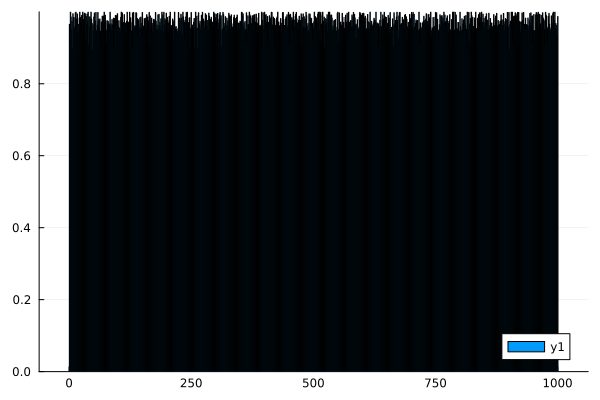

In [28]:
p = bar(collect(1:L),lattice)
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(p)

In [29]:
counts ,bins = getHist(data)

LoadError: UndefVarError: `data` not defined

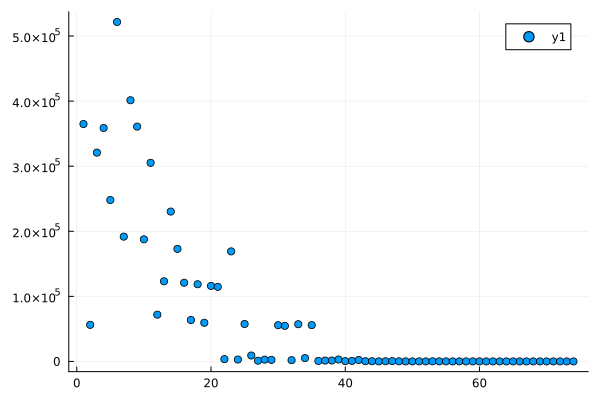

In [ ]:
q = scatter(bins,counts)
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)

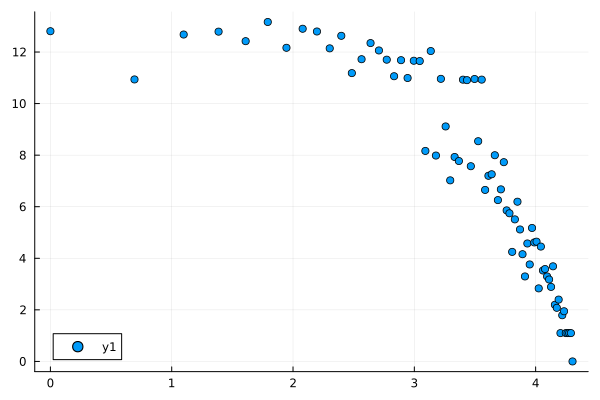

In [ ]:
q = scatter(log.(bins),log.(counts))
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)

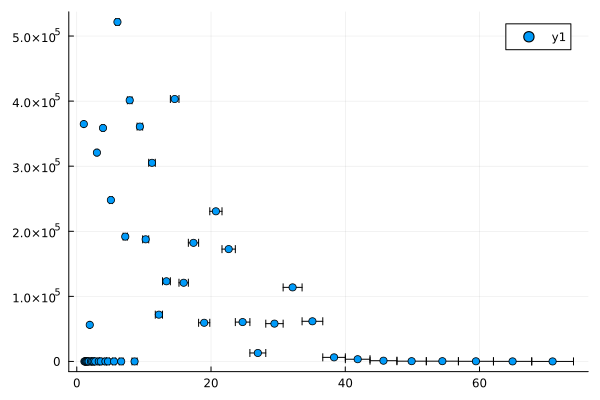

In [ ]:
a = scatterhist(dataSet,bins= exp(1) .^ (range(log(findmin(dataSet)[1]),stop=log(findmax(dataSet)[1]),length=50)))

In [ ]:
using StatsBase

In [ ]:
h = fit(Histogram, dataSet, exp(1) .^ (range(log(findmin(dataSet)[1]),stop=log(findmax(dataSet)[1]),length=50)))

Histogram{Int64, 1, Tuple{Vector{Float64}}}
edges:
  [1.0, 1.0918113032030736, 1.192051921801994, 1.3014957622283636, 1.4209877842718275, 1.551450524581472, 1.6938912190983892, 1.8494095794080556, 2.0192062830497575, 2.2045922433323906  …  33.56629790556825, 36.64806345998106, 40.012769926110884, 43.68639447779187, 47.697299287041496, 52.07645049385183, 56.85765727988273, 62.07783289182249, 67.77727962964333, 74.00000000000001]
weights: [364795, 0, 0, 0, 0, 0, 0, 56202, 0, 0  …  113805, 61693, 6255, 3411, 1120, 398, 399, 225, 71, 26]
closed: left
isdensity: false

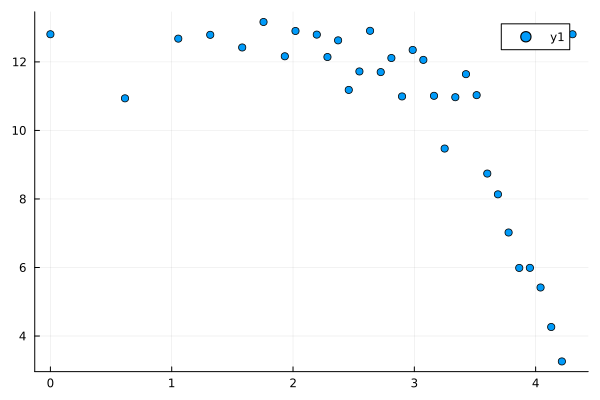

In [ ]:
q = scatter(log.(h.edges[1]),log.(h.weights))
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)

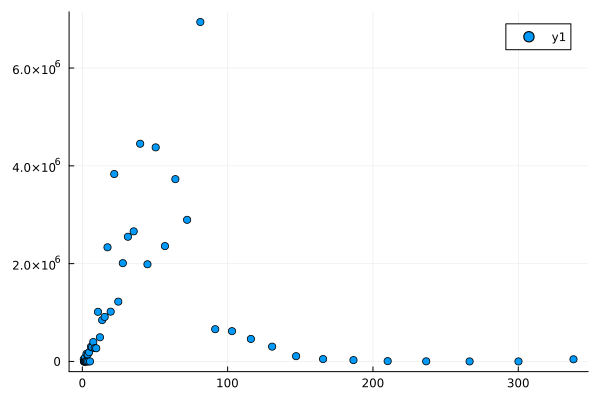

In [ ]:
q = scatter(h.edges[1],h.weights)
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)